In [1]:
using ComputationalHeatTransfer

In [2]:
using Plots
using LaTeXStrings

Note: All temperatures here represent $T - T_0$, where $T_0$ is the undisturbed temperature of the plate. 

### Physical parameters

In [3]:
ρ = 1;
c = 1;
k = 0.1;
d = 0.1;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(1.0, 1.0, 0.1, 0.1, 0.1)

In [4]:
xlim = (-2.0,2.0)
ylim = (-2.0,2.0)
Δx, Δt = setstepsizes(params.α,gridPe=0.1,fourier=200.0)

(0.010000000000000002, 0.02000000000000001)

### Set up the evaporator and condenser

In [33]:
eb = Rectangle(0.5,1.0,1.5*Δx)
Te = RigidTransform((0.0,0.0),0.0)
Te(eb)
cb1 = Rectangle(0.5,1.0,1.5*Δx)
cb2 = Rectangle(0.5,1.0,1.5*Δx)
Tc1 = RigidTransform((1.0,0.0),0.0)
Tc2 = RigidTransform((-1.0,0.0),0.0)

Tc1(cb1)
Tc2(cb2)


qe = 10.0
hc = 10.0
Tc = -50.0

eparams = PrescribedHeatFluxRegion(qe,eb);
cparams1 = PrescribedHeatModelRegion(hc,Tc,cb1);
cparams2 = PrescribedHeatModelRegion(hc,Tc,cb2);

### Set up the OHP

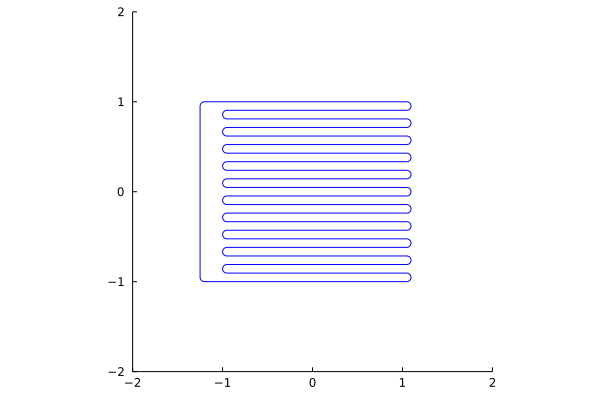

In [51]:
ds = 1.5Δx
nturn = 10
#pitch = 0.125
length = 2.0
height = 2.0
gap = 0.25
pitch = length/(2*nturn+1)
x0, y0 = -1.25, -1.0 #-length/2, 1.25
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,π/2)
ohp = BasicBody(x,y)

plot(ohp,fillalpha=0,linecolor=:blue,xlims=xlim,ylims=ylim)

In [52]:
ohpgeom = ComputationalHeatTransfer.LineSourceParams(ohp)
qtmp = zeros(numpts(ohp));

### Create the system

In [53]:
sys = HeatConduction(params,Δx,xlim,ylim,Δt,qflux=eparams,qmodel=[cparams1,cparams2],qline=ohpgeom)
#sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


#### Initialize state, and create the integrator

In [54]:
u0 = newstate(sys)
tspan = (0.0,1.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Primal nodes in a (nx = 416, ny = 416) cell grid of type Float64 data
  Number of Primal nodes: (nx = 415, ny = 415), Float64[])

### Set up values for the OHP heat flux per unit length and advance the solution

In [55]:
fill!(qtmp,-1.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


In [56]:
step!(integrator,0.2)

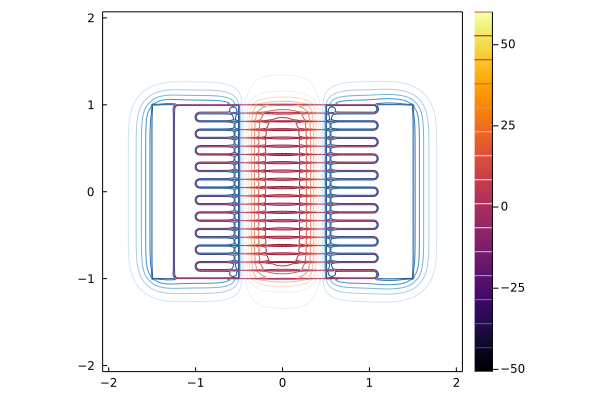

In [57]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))
plot!(ohp,fillalpha=0,line_z=qtmp)

### Now change the values for the OHP heat flux per unit length and advance further

In [17]:
fill!(qtmp,-10.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


In [18]:
step!(integrator,1.0)

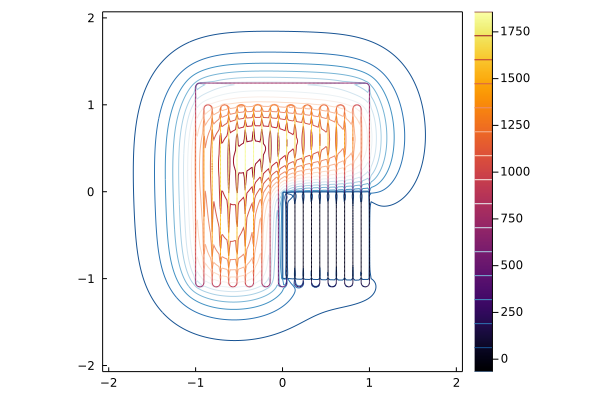

In [25]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))
plot!(ohp,fillalpha=0,line_z=temperature_linesource(integrator))

### Plot the temperature along the OHP channel

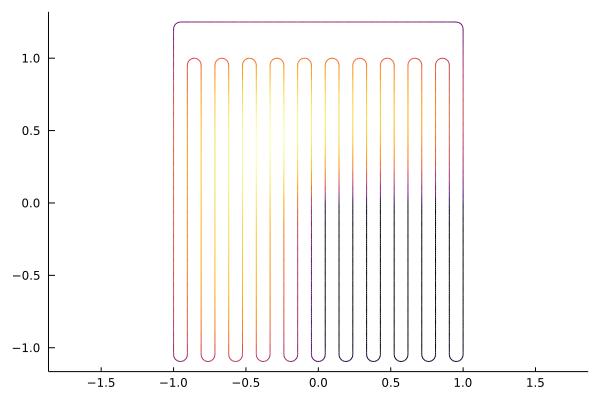

In [27]:
plot(ohp,fillalpha=0,line_z=temperature_linesource(integrator))

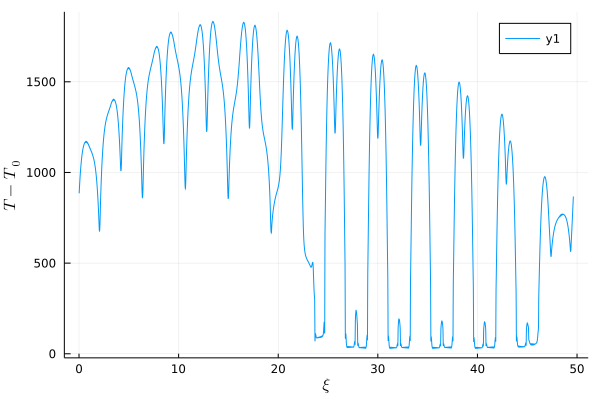

In [28]:
plot(sys.qline[1].arccoord,temperature_linesource(integrator),xlabel=L"\xi",ylabel=L"T - T_0")